In [1]:
from pycaret.datasets import get_data
boston_data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
import pandas as pd

In [4]:
from pycaret.regression import *
exp1 = setup(boston_data, target = 'medv')

,Description,Value
0,session_id,8545
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0991,7.9887,2.8140,0.8917,0.1401,0.1100,0.0150
catboost,CatBoost Regressor,2.0980,8.8915,2.9328,0.8809,0.1350,0.1056,0.3670
et,Extra Trees Regressor,2.1824,9.6945,3.0455,0.8715,0.1375,0.1094,0.0380
rf,Random Forest Regressor,2.3132,10.4611,3.2049,0.8594,0.1493,0.1180,0.0460
lightgbm,Light Gradient Boosting Machine,2.4256,12.4617,3.4589,0.8362,0.1508,0.1196,0.2040
ada,AdaBoost Regressor,2.8968,16.0084,3.9545,0.7802,0.1861,0.1571,0.0130
dt,Decision Tree Regressor,3.2186,19.1967,4.3619,0.7410,0.2158,0.1681,0.0030
lr,Linear Regression,3.3487,22.7878,4.7108,0.7076,0.2217,0.1712,0.2260
ridge,Ridge Regression,3.3511,23.0687,4.7384,0.7050,0.2242,0.1718,0.0020
br,Bayesian Ridge,3.3830,23.7331,4.8039,0.6964,0.2273,0.1734,0.0030


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8545, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8949,6.2131,2.4926,0.9412,0.1205,0.1003
1,1.9054,6.5091,2.5513,0.9263,0.1356,0.1058
2,2.5701,13.1205,3.6222,0.7994,0.1566,0.1217
3,2.7531,11.3872,3.3745,0.8672,0.1451,0.1310
4,2.1630,10.2030,3.1942,0.7718,0.1987,0.1463
5,2.3789,10.6988,3.2709,0.8947,0.1607,0.1156
6,2.7266,14.4149,3.7967,0.8252,0.1317,0.1035
7,2.4968,13.6518,3.6948,0.8179,0.1681,0.1332
8,2.1195,7.8356,2.7992,0.8653,0.1299,0.1092
9,2.1241,10.5773,3.2523,0.8854,0.1464,0.1129


In [8]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5829,15.2679,3.9074,0.8556,0.1581,0.1304
1,2.4739,11.9182,3.4523,0.8650,0.1800,0.1456
2,2.5208,20.1409,4.4879,0.6921,0.1464,0.1067
3,2.8991,16.2757,4.0343,0.8102,0.1544,0.1353
4,2.4686,11.3632,3.3709,0.7459,0.2166,0.1755
5,2.5513,14.3312,3.7857,0.8589,0.1312,0.1011
6,3.6248,42.8826,6.5485,0.4800,0.2053,0.1212
7,3.2039,30.6967,5.5405,0.5905,0.2178,0.1647
8,2.3578,9.0674,3.0112,0.8441,0.1369,0.1211
9,2.8322,18.0823,4.2523,0.8041,0.1669,0.1404


In [9]:
tuned_rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=9, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=-1, oob_score=False,
                      random_state=8545, verbose=0, warm_start=False)>

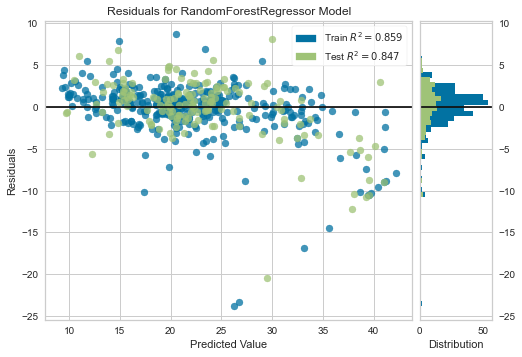

In [10]:
plot_model(tuned_rf)

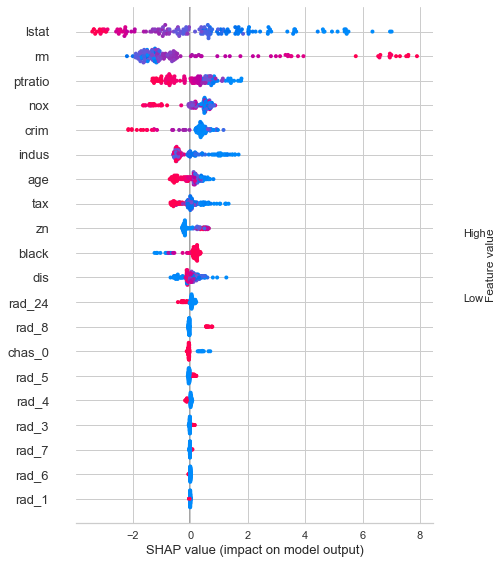

In [12]:
interpret_model(tuned_rf)

In [13]:
rf_holdout_pred = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.0398,10.4916,3.2391,0.8827,0.1353,0.1032


In [14]:
predictions = predict_model(rf, data=boston_data)

In [15]:
predictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.065000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.411000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.428000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.465001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,33.867001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,23.478000
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,16.462000
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,25.064000
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,23.275000
